# Assignment 2: Team Evaluation

## Objective
Evaluate a team's season performance through Efficiency and the Four Factors. Offense, defense, and everything in between.


## Instructions
Team Evaluation

- Choose a Team: Select one team from the NBA, WNBA, NCAA, or International Leagues based on their most *recent*, completed season (not partial or current).
    - Effective Field Goal % (eFG%)
    - Turnover % (TOV%)
    - Offensive Rebound % (OREB%)
    - Free Throw Rate (FTR)
- Evaluate Team Efficiency:
    - Offensive Rating (points scored per 100 possessions)
    - Defensive Rating (points scored per 100 possessions)
    - Net Rating (difference between Offensive & Defensive Ratings)
- Write Your 1-Page Summary: In no more than 1-Page, include:
    - Team Name, Season, and League
    - Key Stats from the Four Factors and Efficiency Metrics
    - Interpretation: What do these numbers reveal about their playing style, strengths, and weaknesses?
    - Conclusion: Was the team's performance aligned with their record? Why or why not?

## Suggested Structure

### Header: Team Name | League | Season

#### Section 1: Overview 

(2 - 3 Sentences)

#### Section 2: Four Factors Breakdown 

(Short Cart or Bullet List)

#### Section 3: Efficiency Analysis 

(OER, DER, Net Rating)

#### Section 4: Interpretation 
(Short Paragraph)

#### Section 5: Final Insight / Summary 

(2 - 3 Sentences)

In [2]:
# ===============================
# Basketball Analytics: Four Factors + Ratings
# Foundational helper toolkit
# ===============================

import pandas as pd
import numpy as np

# ------------ Data loading ------------
def gather_data(df):
    """
    Gather key DataFrames from a workbook dict loaded via:
        dfs = pd.read_excel("Pistons_Stats.xlsx", sheet_name=None)
    Returns:
        team_df, team_rank_df, team_misc_df, team_misc_rank_df,
        opp_df, opp_rank_df, league_df
    """
    team_df = df["Team Stats"]
    team_rank_df = df["Team Rankings"]
    team_misc_df = df["Team Misc"]
    team_misc_rank_df = df["Team Misc Rankings"]
    opp_df = df["Opponent Stats"]
    opp_rank_df = df["Opponent Rankings"]
    league_df = df["League Average Total Stats"]
    print("Sheets have been successfully read and saved!")
    return (team_df, team_rank_df, team_misc_df, team_misc_rank_df,
            opp_df, opp_rank_df, league_df)

# ------------ Four Factors Functions ------------
def calculate_eFG_percentage(fgm, made_3s, fga):
    """
    Effective Field Goal Percentage (eFG%)
    eFG% = (FGM + 0.5 * 3PM) / FGA
    Returns decimal (e.g., 0.521 for 52.1%)
    """
    num = fgm + 0.5 * made_3s
    denom = fga
    if denom == 0:
        return np.nan
    return num / denom

def calculate_tov_percentage(tov, fga, fta):
    """
    Turnover Percentage (TOV%)
    TOV% = TOV / (FGA + 0.44 * FTA + TOV)
    Returns decimal.
    """
    num = tov
    denom = fga + 0.44 * fta + tov
    if denom == 0:
        return np.nan
    return num / denom

def calculate_estimated_oreb_percentage(oreb, opp_dreb):
    """
    Offensive Rebound Percentage (OREB%)
    OREB% = OREB / (OREB + Opp_DREB)
    Returns decimal.
    """
    num = oreb
    denom = oreb + opp_dreb
    if denom == 0:
        return np.nan
    return num / denom

def calculate_estimated_dreb_percentage(dreb, opp_oreb):
    """
    Defensive Rebound Percentage (DRB%)
    DRB% = DRB / (DRB + Opp_ORB)
    """
    denom = dreb + opp_oreb
    if denom == 0:
        return np.nan
    return dreb / denom

def calculate_ftr(fta, fga):
    """
    Free Throw Rate (FTR)
    FTR = FTA / FGA
    Returns decimal.
    """
    if fga == 0:
        return np.nan
    return fta / fga

# ------------ Possessions, Ratings, & Pace ------------
def estimated_team_possessions(fga, fta, tov, oreb):
    """
    Single-side estimated possessions:
    Poss = FGA + 0.44*FTA + TOV - OREB
    """
    return fga + 0.44 * fta + tov - oreb

def estimated_game_possessions(team_fga, team_fta, team_tov, team_oreb,
                               opp_fga,  opp_fta,  opp_tov,  opp_oreb):
    """
    Dean Oliver shared-possession estimate for a game/season:
    0.5 * (TeamPoss + OppPoss)
    """
    team_poss = estimated_team_possessions(team_fga, team_fta, team_tov, team_oreb)
    opp_poss  = estimated_team_possessions(opp_fga,  opp_fta,  opp_tov,  opp_oreb)
    return 0.5 * (team_poss + opp_poss)

def calculate_offensive_efficiency(points, shared_possessions):
    """
    Offensive Rating (OER) = 100 * (Points / SharedPossessions)
    """
    if shared_possessions == 0:
        return np.nan
    return 100 * (points / shared_possessions)

def calculate_defensive_efficiency(opponent_points, shared_possessions):
    """
    Defensive Rating (DER) = 100 * (Opp Points / SharedPossessions)
    """
    if shared_possessions == 0:
        return np.nan
    return 100 * (opponent_points / shared_possessions)

def calculate_net_rating(oer, der):
    """
    Net Rating = OER - DER
    """
    if pd.isna(oer) or pd.isna(der):
        return np.nan
    return oer - der

def calculate_pace(team_fga, team_fta, team_tov, team_oreb,
                   opp_fga, opp_fta, opp_tov, opp_oreb,
                   team_min = 240, minutes_per_game = 48):
    """
    Calculate team Pace (possessions per 48 minutes).
    Pace = 48 * ((TeamPoss + OppPoss) / (2 * (TeamMin / 5)))
    Parameters:
        team_fga, team_fta, team_tov, team_oreb (float): team stats
        opp_fga, opp_fta, opp_tov, opp_oreb (float): opponent stats
        team_min (float): total minutes played (default = 240 for a 48-min game)
        minutes_per_game (float): Regulation game length (NBA=48, WNBA/FIBA=40)
    
    Returns:
        float: possessions per 48 minutes
    """
    team_poss = estimated_team_possessions(team_fga, team_fta, team_tov, team_oreb)
    opp_poss  = estimated_team_possessions(opp_fga,  opp_fta,  opp_tov,  opp_oreb)
    avg_poss  = (team_poss + opp_poss) / 2
    if team_min == 0:
        return np.nan
    return minutes_per_game * avg_poss / (team_min / 5)


# ------------ One-season analyzer ------------
def four_factors_and_ratings_for_year(team, team_row, opp_row):
    """
    Compute Four Factors (team/opponent + differentials) and Ratings for a single season.
    Expects two pandas Series (one row each) with standard columns:
    ['Year','FG','FGA','3P','FTA','TOV','ORB','DRB','PTS', ...]
    """
    # Four Factors – Team
    team_efg = calculate_eFG_percentage(team_row["FG"], team_row["3P"], team_row["FGA"])
    team_tov = calculate_tov_percentage(team_row["TOV"], team_row["FGA"], team_row["FTA"])
    team_orb = calculate_estimated_oreb_percentage(team_row["ORB"], opp_row["DRB"])
    team_drb = calculate_estimated_dreb_percentage(team_row["DRB"], opp_row["ORB"])
    team_ftr = calculate_ftr(team_row["FTA"], team_row["FGA"])

    # Four Factors – Opponent
    opp_efg = calculate_eFG_percentage(opp_row["FG"], opp_row["3P"], opp_row["FGA"])
    opp_tov = calculate_tov_percentage(opp_row["TOV"], opp_row["FGA"], opp_row["FTA"])
    opp_orb = calculate_estimated_oreb_percentage(opp_row["ORB"], team_row["DRB"])
    opp_drb = calculate_estimated_dreb_percentage(opp_row["DRB"], team_row["ORB"])
    opp_ftr = calculate_ftr(opp_row["FTA"], opp_row["FGA"])

    # Shared possessions for ratings
    poss = estimated_game_possessions(
        team_row["FGA"], team_row["FTA"], team_row["TOV"], team_row["ORB"],
        opp_row["FGA"],  opp_row["FTA"],  opp_row["TOV"],  opp_row["ORB"]
    )
    pace = calculate_pace(
        team_row["FGA"], team_row["FTA"], team_row["TOV"], team_row["ORB"],
        opp_row["FGA"],  opp_row["FTA"],  opp_row["TOV"],  opp_row["ORB"],
        team_min=team_row["MP"]
    )

    # Team Ratings: OER, DER, and Net Rating
    oer = calculate_offensive_efficiency(team_row["PTS"], poss)
    der = calculate_defensive_efficiency(opp_row["PTS"], poss)
    net = calculate_net_rating(oer, der)

    

    return {
        "Year": int(team_row["Year"]),
        
        # Offense Four Factors
        "Team_eFG%": team_efg,
        "Team_TOV%": team_tov,
        "Team_OREB%": team_orb,           
        "Team_FTR":  team_ftr,
    
        # Defense Four Factors 
        "Opp_eFG%":  opp_efg,
        "Opp_TOV%":  opp_tov,
        "Team_DRB%": team_drb,       
        "Opp_FTR":   opp_ftr,
    
        # Symmetric opponent rebounding rates (handy for differentials/plots)
        "Opp_OREB%": opp_orb,
        "Opp_DRB%":  opp_drb,
    
        # Differentials
        "ΔeFG%":     (team_efg - opp_efg),
        "ΔTOV%":     (team_tov - opp_tov),
        "ΔOREB%":    (team_orb - opp_orb),  # ORB% vs Opp OREB% (same family)
        "ΔDRB%":     (team_drb - opp_drb),  # DRB% vs Opp DRB%
        "ΔFTR":     (team_ftr - opp_ftr),
    
        # Ratings / tempo
        "Poss": poss,
        "Pace": pace,
        "OER":  oer,
        "DER":  der,
        "NetRtg": net,
    }

def analyze_year(team_df, opp_df, year, team):
    """
    Selects the season's data and prints key Four Factors + Ratings metrics.
    """
    if year not in team_df["Year"].values or year not in opp_df["Year"].values:
        raise ValueError(f"Year {year} not found in one or both DataFrames.")

    team_row = team_df.loc[team_df["Year"] == year].iloc[0]
    opp_row  = opp_df.loc[opp_df["Year"] == year].iloc[0]
    results  = four_factors_and_ratings_for_year(team, team_row, opp_row)

    # ----- Print Results -----
    print(f"\n🏀 {year} {team} - Four Factors Analysis 🏀")
    print(f"{team} eFG%: {results['Team_eFG%']:.3%}")
    print(f"Opponent eFG%: {results['Opp_eFG%']:.3%}")
    print(f"eFG% Differential: {results['ΔeFG%']:+.3%}\n")

    print(f"{team} TOV%: {results['Team_TOV%']:.3%}")
    print(f"Opponent TOV%: {results['Opp_TOV%']:.3%}")
    print(f"TOV% Differential: {results['ΔTOV%']:+.3%}\n")

    print(f"{team} OREB%: {results['Team_OREB%']:.3%}")
    print(f"Opponent OREB%: {results['Opp_OREB%']:.3%}")
    print(f"OREB% Differential: {results['ΔOREB%']:+.3%}\n")
    
    print(f"{team} FTR: {results['Team_FTR']:.3%}")
    print(f"Opponent FTR: {results['Opp_FTR']:.3%}")
    print(f"FTR Differential: {results['ΔFTR']:+.3%}\n")

    print(f"Pace: {results['Pace']:.2f}")
    print(f"OER: {results['OER']:.2f}")
    print(f"DER: {results['DER']:.2f}")
    print(f"Net Rating: {results['NetRtg']:+.2f}\n")

    print(f"{team} Offense — eFG%: {results['Team_eFG%']:.3%} | TOV%: {results['Team_TOV%']:.3%} "
      f"| ORB%: {results['Team_OREB%']:.3%} | FTR: {results['Team_FTR']:.3f}")
    print(f"{team} Defense — eFG%: {results['Opp_eFG%']:.3%} | TOV%: {results['Opp_TOV%']:.3%} "
      f"| DRB%: {results['Team_DRB%']:.3%} | FTR: {results['Opp_FTR']:.3f}")
    
    print("-" * 40)

    return results
#####################

# Step 1: Load workbook and gather sheets
data = pd.read_excel("Pistons_Team_data.xlsx", sheet_name = None)
team_df, team_rank_df, team_misc_df, team_misc_rank_df, opp_df, opp_rank_df, league_df = gather_data(data)

# Step 2: Analyze a season
results_2025 = analyze_year(team_df, opp_df, 2025, "Detroit Pistons")

# Step 3: Optional Test - Build a small DataFrame for multiple years
#years = [2023, 2024, 2025]
#table = pd.DataFrame([analyze_year(team_df, opp_df, y, "Detroit Pistons") for y in years])
#display(table)

Sheets have been successfully read and saved!

🏀 2025 Detroit Pistons - Four Factors Analysis 🏀
Detroit Pistons eFG%: 54.713%
Opponent eFG%: 53.890%
eFG% Differential: +0.822%

Detroit Pistons TOV%: 12.988%
Opponent TOV%: 13.251%
TOV% Differential: -0.263%

Detroit Pistons OREB%: 26.233%
Opponent OREB%: 23.959%
OREB% Differential: +2.274%

Detroit Pistons FTR: 24.800%
Opponent FTR: 27.587%
FTR Differential: -2.787%

Pace: 102.47
OER: 112.01
DER: 110.16
Net Rating: +1.84

Detroit Pistons Offense — eFG%: 54.713% | TOV%: 12.988% | ORB%: 26.233% | FTR: 0.248
Detroit Pistons Defense — eFG%: 53.890% | TOV%: 13.251% | DRB%: 76.041% | FTR: 0.276
----------------------------------------


✅ Saved: charts/Detroit_Pistons_eFG%_2025.png



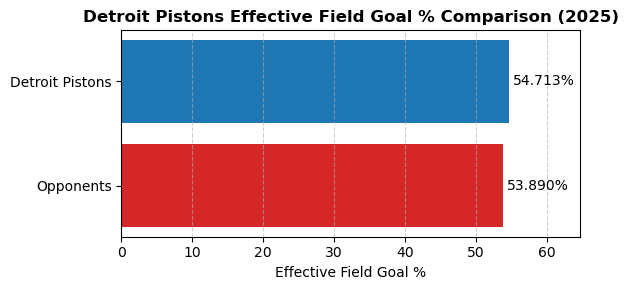



✅ Saved: charts/Detroit_Pistons_TOV%_2025.png



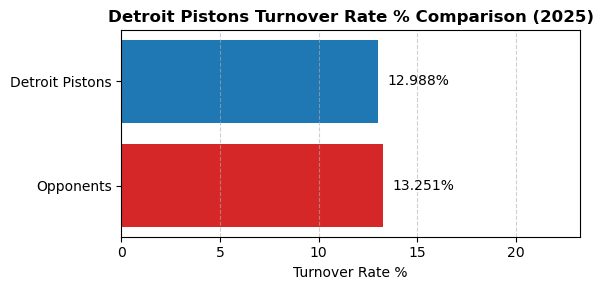



✅ Saved: charts/Detroit_Pistons_OREB%_2025.png



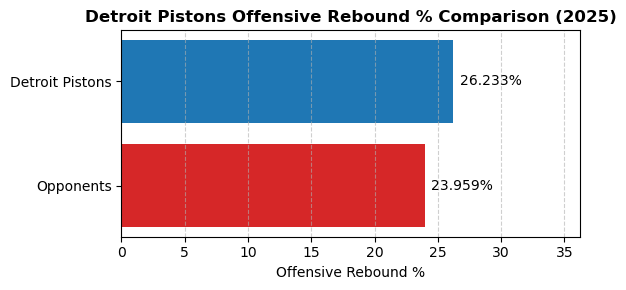



✅ Saved: charts/Detroit_Pistons_FTR_2025.png



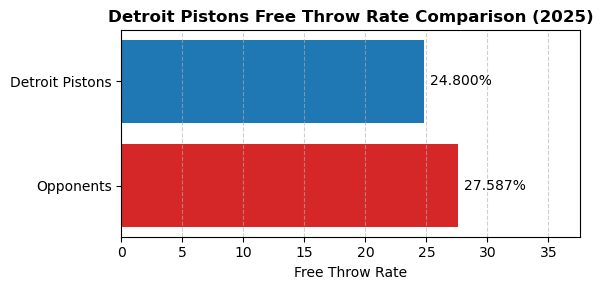

In [3]:
# Create Plots for Data Visualizations
import matplotlib.pyplot as plt
import os

def plot_four_factor(results, metric, label, team_name,
                     color_team="#1f77b4", color_opp="#d62728",
                     save_folder="charts"):
    """
    Generic horizontal bar chart for any Four Factor metric.
    Automatically saves as .png in a 'charts' folder.

    Parameters:
        results (dict): Returned dictionary from analyze_year()
        metric (str): Metric key suffix (e.g., 'eFG%', 'TOV%', 'OREB%', 'FTR')
        label (str): Metric display label
        team_name (str): Team name
        color_team, color_opp: Optional color hex codes
        save_folder (str): Folder to save PNG files
    """
    # Ensure save folder exists
    os.makedirs(save_folder, exist_ok=True)

    team_key = f"Team_{metric}"
    opp_key = f"Opp_{metric}"

    team_value = results[team_key] * 100
    opp_value  = results[opp_key] * 100

    # Place team on top
    categories = [f"{team_name}", "Opponents"]
    values = [team_value, opp_value]
    colors = [color_team, color_opp]

    # Reverse order for display (so team appears on top)
    categories = categories[::-1]
    values = values[::-1]
    colors = colors[::-1]

    # Create figure
    plt.figure(figsize=(6, 3))
    plt.barh(categories, values, color=colors)

    plt.title(f"{team_name} {label} Comparison ({int(results['Year'])})",
              fontsize=12, weight="bold")
    plt.xlabel(label)
    plt.xlim(0, max(values) + 10)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Annotations (3 decimal places)
    for i, v in enumerate(values):
        plt.text(v + 0.5, i, f"{v:.3f}%", va='center')

    plt.tight_layout()

    # Save plot as .png
    filename = f"{save_folder}/{team_name.replace(' ', '_')}_{metric}_{int(results['Year'])}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"✅ Saved: {filename}\n")
    
    plt.show()
    print("\n")

# Create Bar Charts for Each of the Four Factors
plot_four_factor(results_2025, "eFG%", "Effective Field Goal %", "Detroit Pistons")
plot_four_factor(results_2025, "TOV%", "Turnover Rate %", "Detroit Pistons")
plot_four_factor(results_2025, "OREB%", "Offensive Rebound %", "Detroit Pistons")
plot_four_factor(results_2025, "FTR", "Free Throw Rate", "Detroit Pistons")

✅ Saved: charts/Detroit_Pistons_Efficiency_2025.png


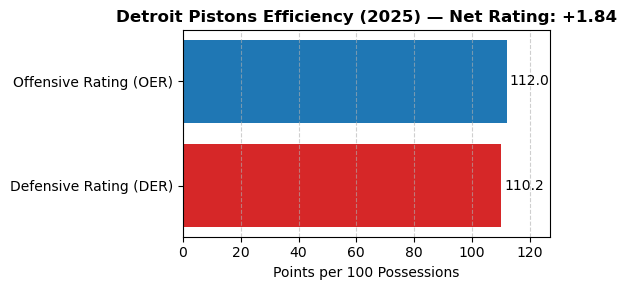

In [4]:
import matplotlib.pyplot as plt
import os
import re

def _sanitize_filename(s: str) -> str:
    return re.sub(r'[^A-Za-z0-9_\-]+', '_', s)

def plot_efficiency(results, team_name, save_folder="charts"):
    """
    Plot Offensive Rating (OER) vs Defensive Rating (DER) in one chart.
    Net Rating is shown in the title. Saves as PNG.

    Parameters:
        results (dict): Returned dictionary from analyze_year()
        team_name (str): Team name
        save_folder (str): Folder to save the PNG
    """
    os.makedirs(save_folder, exist_ok=True)
    year = int(results["Year"])
    oer = float(results["OER"])
    der = float(results["DER"])
    net = float(results["NetRtg"])

    # Create chart
    labels = ["Defensive Rating (DER)", "Offensive Rating (OER)"]
    values = [der, oer]
    colors = ["#d62728", "#1f77b4"]  # Red for defense, blue for offense

    plt.figure(figsize=(6, 3))
    bars = plt.barh(labels, values, color=colors)

    plt.title(
        f"{team_name} Efficiency ({year}) — Net Rating: {net:+.2f}",
        fontsize=12,
        weight="bold"
    )
    plt.xlabel("Points per 100 Possessions")
    plt.xlim(0, max(values) + 15)  # Add more horizontal space
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Annotate bar values slightly inside the chart area
    for i, v in enumerate(values):
        plt.text(v + 1, i, f"{v:.1f}", va="center", ha="left", fontsize=10)

    plt.tight_layout(rect=[0, 0, 0.95, 1])  # Add right padding
    fname = f"{_sanitize_filename(save_folder)}/{_sanitize_filename(team_name)}_Efficiency_{year}.png"
    plt.savefig(fname, dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {fname}")

    plt.show()

# Create a Bar Chart for OER and DER
plot_efficiency(results_2025, "Detroit Pistons")

In [8]:
results_2025

{'Year': 2025,
 'Team_eFG%': 0.5471275295395899,
 'Team_TOV%': 0.12988203003801632,
 'Team_OREB%': 0.26232741617357,
 'Team_FTR': 0.247996740459052,
 'Opp_eFG%': 0.5389042995839113,
 'Opp_TOV%': 0.1325084547904757,
 'Team_DRB%': 0.7604108828428651,
 'Opp_FTR': 0.27586685159500696,
 'Opp_OREB%': 0.23958911715713493,
 'Opp_DRB%': 0.73767258382643,
 'ΔeFG%': 0.00822322995567859,
 'ΔTOV%': -0.0026264247524593887,
 'ΔOREB%': 0.022738299016435093,
 'ΔDRB%': 0.022738299016435093,
 'ΔFTR': -0.027870111135954945,
 'Poss': 8455.8,
 'Pace': 102.46866952789699,
 'OER': 112.00596040587527,
 'DER': 110.16107287305756,
 'NetRtg': 1.8448875328177081}